In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import mnist

In [36]:
(x_train, _),(x_test, _) = mnist.load_data()

In [41]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [42]:
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

In [43]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [55]:
encoding_dim = 32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim,activation='relu')(input_img)
decoded = layers.Dense(784,activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img,decoded)

In [56]:
encoder = keras.Model(input_img,encoded)

In [57]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input,decoder_layer(encoded_input))

In [58]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [62]:
autoencoder.fit(x_train,x_train,epochs=20,batch_size=64,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 3/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 6/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0038 - val_loss: 0.0039

In [63]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


In [50]:
import matplotlib.pyplot as plt

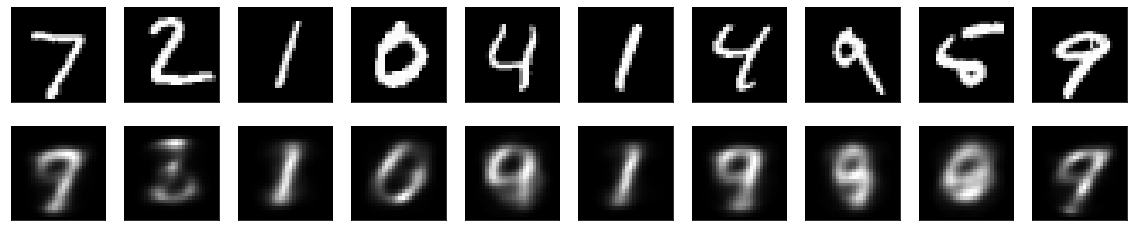

In [64]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()    